<center><H1> Deep Learning and ANN Assignment 1 </H1></center><br/>
<center><H1> Student Id: 2021AIML064 </H1></center><br/>
<center><H1> Student Name:Jagadish Yalla </H1></center><br/>

Q1. Train a perceptron
Perceptron is a fundamental building block for neural networks. Let us try to train
a single perceptron. Consider the data given in the following table. As one can see,
it has two attributes x1,x2, and a class label (either 0 or 1)
1. Implement the perceptron training rule and get the appropriate parameters for a
single perceptron (Using only basic libraries like NumPy)
2. Plot the data points and the obtained decision boundary
3. Also draw the schematic diagram of the trained perceptron with learned weights.
You can draw this on paper and upload it in the Python notebook [2+2+1= 5 Marks]

Q2. Train a neural network
Let us design a neural network to classify the Pima Indians Diabetes Dataset.
1. Implement a single hidden layer MLP. The final output layer will have 3 neurons, one for each result. Arch: [Input, hidden, output]
2. Now use a NN with three hidden layers. The first hidden layer has 8 neurons. The second hidden layer has 4 neurons. The third hidden layer has 4 neurons. Arch: [Input,hidden1(8),hidden2(4),hidden3(4),output]    
(i) Use Keras or any other framework to design the NN model and train on
the diabetes data. Report the accuracy.           
(ii) Draw the schematic diagram of the NN along with all the weights and
specify a suitable activation function.[ 2 (NN1) + 3 (NN2) + 2(diagram)= 7 Marks]

Note: The architecture for NN1 and NN2 is clearly mentioned, any change in the number of layers/neurons will be penalized in the marks

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import math
import matplotlib.image as mpimg

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import keras

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model


import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import model_to_dot


warnings.filterwarnings("ignore")

In [2]:
# construct the input data provided in the assignment image
X1 = [-3.98,-3.464,-3.461,-2.22,-2.02,-2.01,-1.42,-1.416,-1.09,-0.19,0.01,0.03,0.04,0.06,0.07,0.12,1.11,1.411,1.414,1.86,1.96,2.11]
X2 = [-0.12,-2.11,1.89,-3.474,0.03,3.459,-1.409,1.419,0.08,-4.13,1.02,-2.12,2.06,3.97,0.1,-1.12,0.09,1.419,-1.415,3.47,-0.12,-3.472]
Y = [1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1]

In [3]:
print('Check for length: ',len(X1) == len(X2) == len(Y))
print('Length equals: ',len(Y))

Check for length:  True
Length equals:  22


In [4]:
# create a dataframe with the input/target variables
df = pd.DataFrame ({'X1':  X1, 'X2': X2, 'Y': Y })
df.head()

,X1,X2,Y
0,-3.980,-0.120,1
1,-3.464,-2.110,1
2,-3.461,1.890,1
3,-2.220,-3.474,1
4,-2.020,0.030,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      22 non-null     float64
 1   X2      22 non-null     float64
 2   Y       22 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 656.0 bytes


<AxesSubplot:>

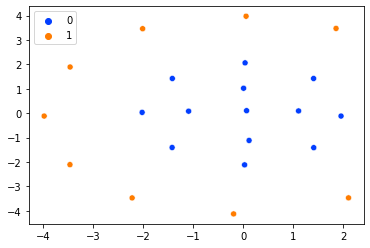

In [6]:
# visualise the relationship between the input/target variables
sns.scatterplot(x=X1, y=X2, hue=Y, palette='bright', data=df)

### Q1.1) Implement the perceptron training rule and get the appropriate parameters for a single perceptron (Using only basic libraries like NumPy)


In [7]:
class Perceptron(object):
    """
    Description
    -----------
    The Perceptron class, implementing the pereceptron rule/algorithm from scratch
    
    Parameters
    ----------
    learning_rate : float, optional
        The learning rate that will be applied in the gradient descent step

    n_iter : int, optional
        The number of iterations the gradient descent is to be iterated for

    random_state : int, optional
        The value to initialize the random_state variable used as input in generating initial rand weights

    Methods / Functions
    --------------------
    
    __init__ - The constructor method of this class; class variables are set based on input/default values. 
    
    fit      - The fit method implements the core alogrithm / training rule and learns the weights based on the input

               Takes as input two mandatory parameters X, y
    
               X - the ndarray of input variables
    
               y - the 1D array of target variable
    
    predict  - Based on the weights created, this method predicts the output for any given input

               Takes as input X, the ndarray of input variables and returns the predict output as a 1D array

    Usage Examples:
    ---------------
    Example 1: Perceptron(learning_rate=0.01, n_iter=50, random_state=1)
    Example 2: Perceptron(n_iter=50, random_state=1)
    Example 3: Perceptron(random_state=1)
    Example 4: Perceptron()

    """
    def __init__(self, learning_rate=0.01, n_iter=50, random_state=1):
        # Set the learning rate, iterations and random state variables to the values 
        # provided in the input or to default values, in case input is not provided
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        # Based on the random_state variable create a rand number
        rand = np.random.RandomState(self.random_state)
        
        # Create weights array, that are normally distributed, of the size of the # of columns in the input  
        self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])

        # As we start off, create an empty list that records errors through the iterations
        self.errors_ = []

        # Iterate as many items as specified in the input
        for _ in range(self.n_iter):
            errors = 0
            for x, target in zip(X, y):
                # For every x in X, we calcuate the diff b/w the predicted and expected target
                # using the difference calculated, update the weights (increase/decrease) based
                # on the sign of the difference. In case the the difference is 0, the weights
                # are not altered. Whenever the difference is not 0, we increment the error count
                update = self.learning_rate * (target - self.predict(x))
                self.weights[1:] += update * x
                self.weights[0] += update
                errors += int(update != 0.0)

            # append the value of all errors encountered during the iterations
            self.errors_.append(errors)
        return self
    
    def predict(self, X):
        # apply the weights to the input variable X 
        # apply the unit step function as the activation function
        # and return the result
        return np.where((np.dot(X, self.weights[1:]) + self.weights[0])>= 0, 1, 0)

In [8]:
X = df [ [ "X1", "X2" ] ].to_numpy()
y = df [ 'Y' ].to_numpy()

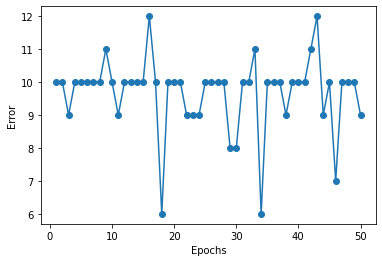

In [9]:
# create and object of the Perceptron class
per = Perceptron(learning_rate=0.01, n_iter=50, random_state=1)

# involve the fit method to learn the weights
per.fit(X, y)

# plot the errors obtained during the iterations, stored in the per.errors_ list variable
plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [10]:
# display the weights calculated by our algorithm
# the weights are of the form - [w0, w1, w2] ( w0 is the bias weight, w1, w2 the weights of x1, x2 respectively)
per.weights

array([-0.00375655,  0.01847244,  0.00540828])

### **Q1.2 Plot the data points and the obtained decision boundary - 2 Marks**

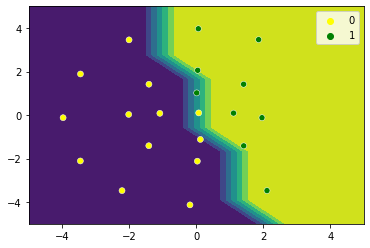

In [11]:
# plot the decision boundary
xx = np.linspace(-5, 5, 10)
yy = np.linspace(-5, 5, 10)
xx, yy = np.meshgrid(xx, yy)
z = per.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
h = plt.contourf(xx, yy, z)
yy = per.predict(X)
yy = list(yy)
#yy = [1 if yy[i] == Y[i] else 0 for i in range (len(X1))]
sns.scatterplot(x=X1, y=X2, hue=yy, palette=['yellow','green'], data=df)
plt.show()

### Q1.3 Draw the schematic diagram of the trained perceptron with learned weights - 1 Mark

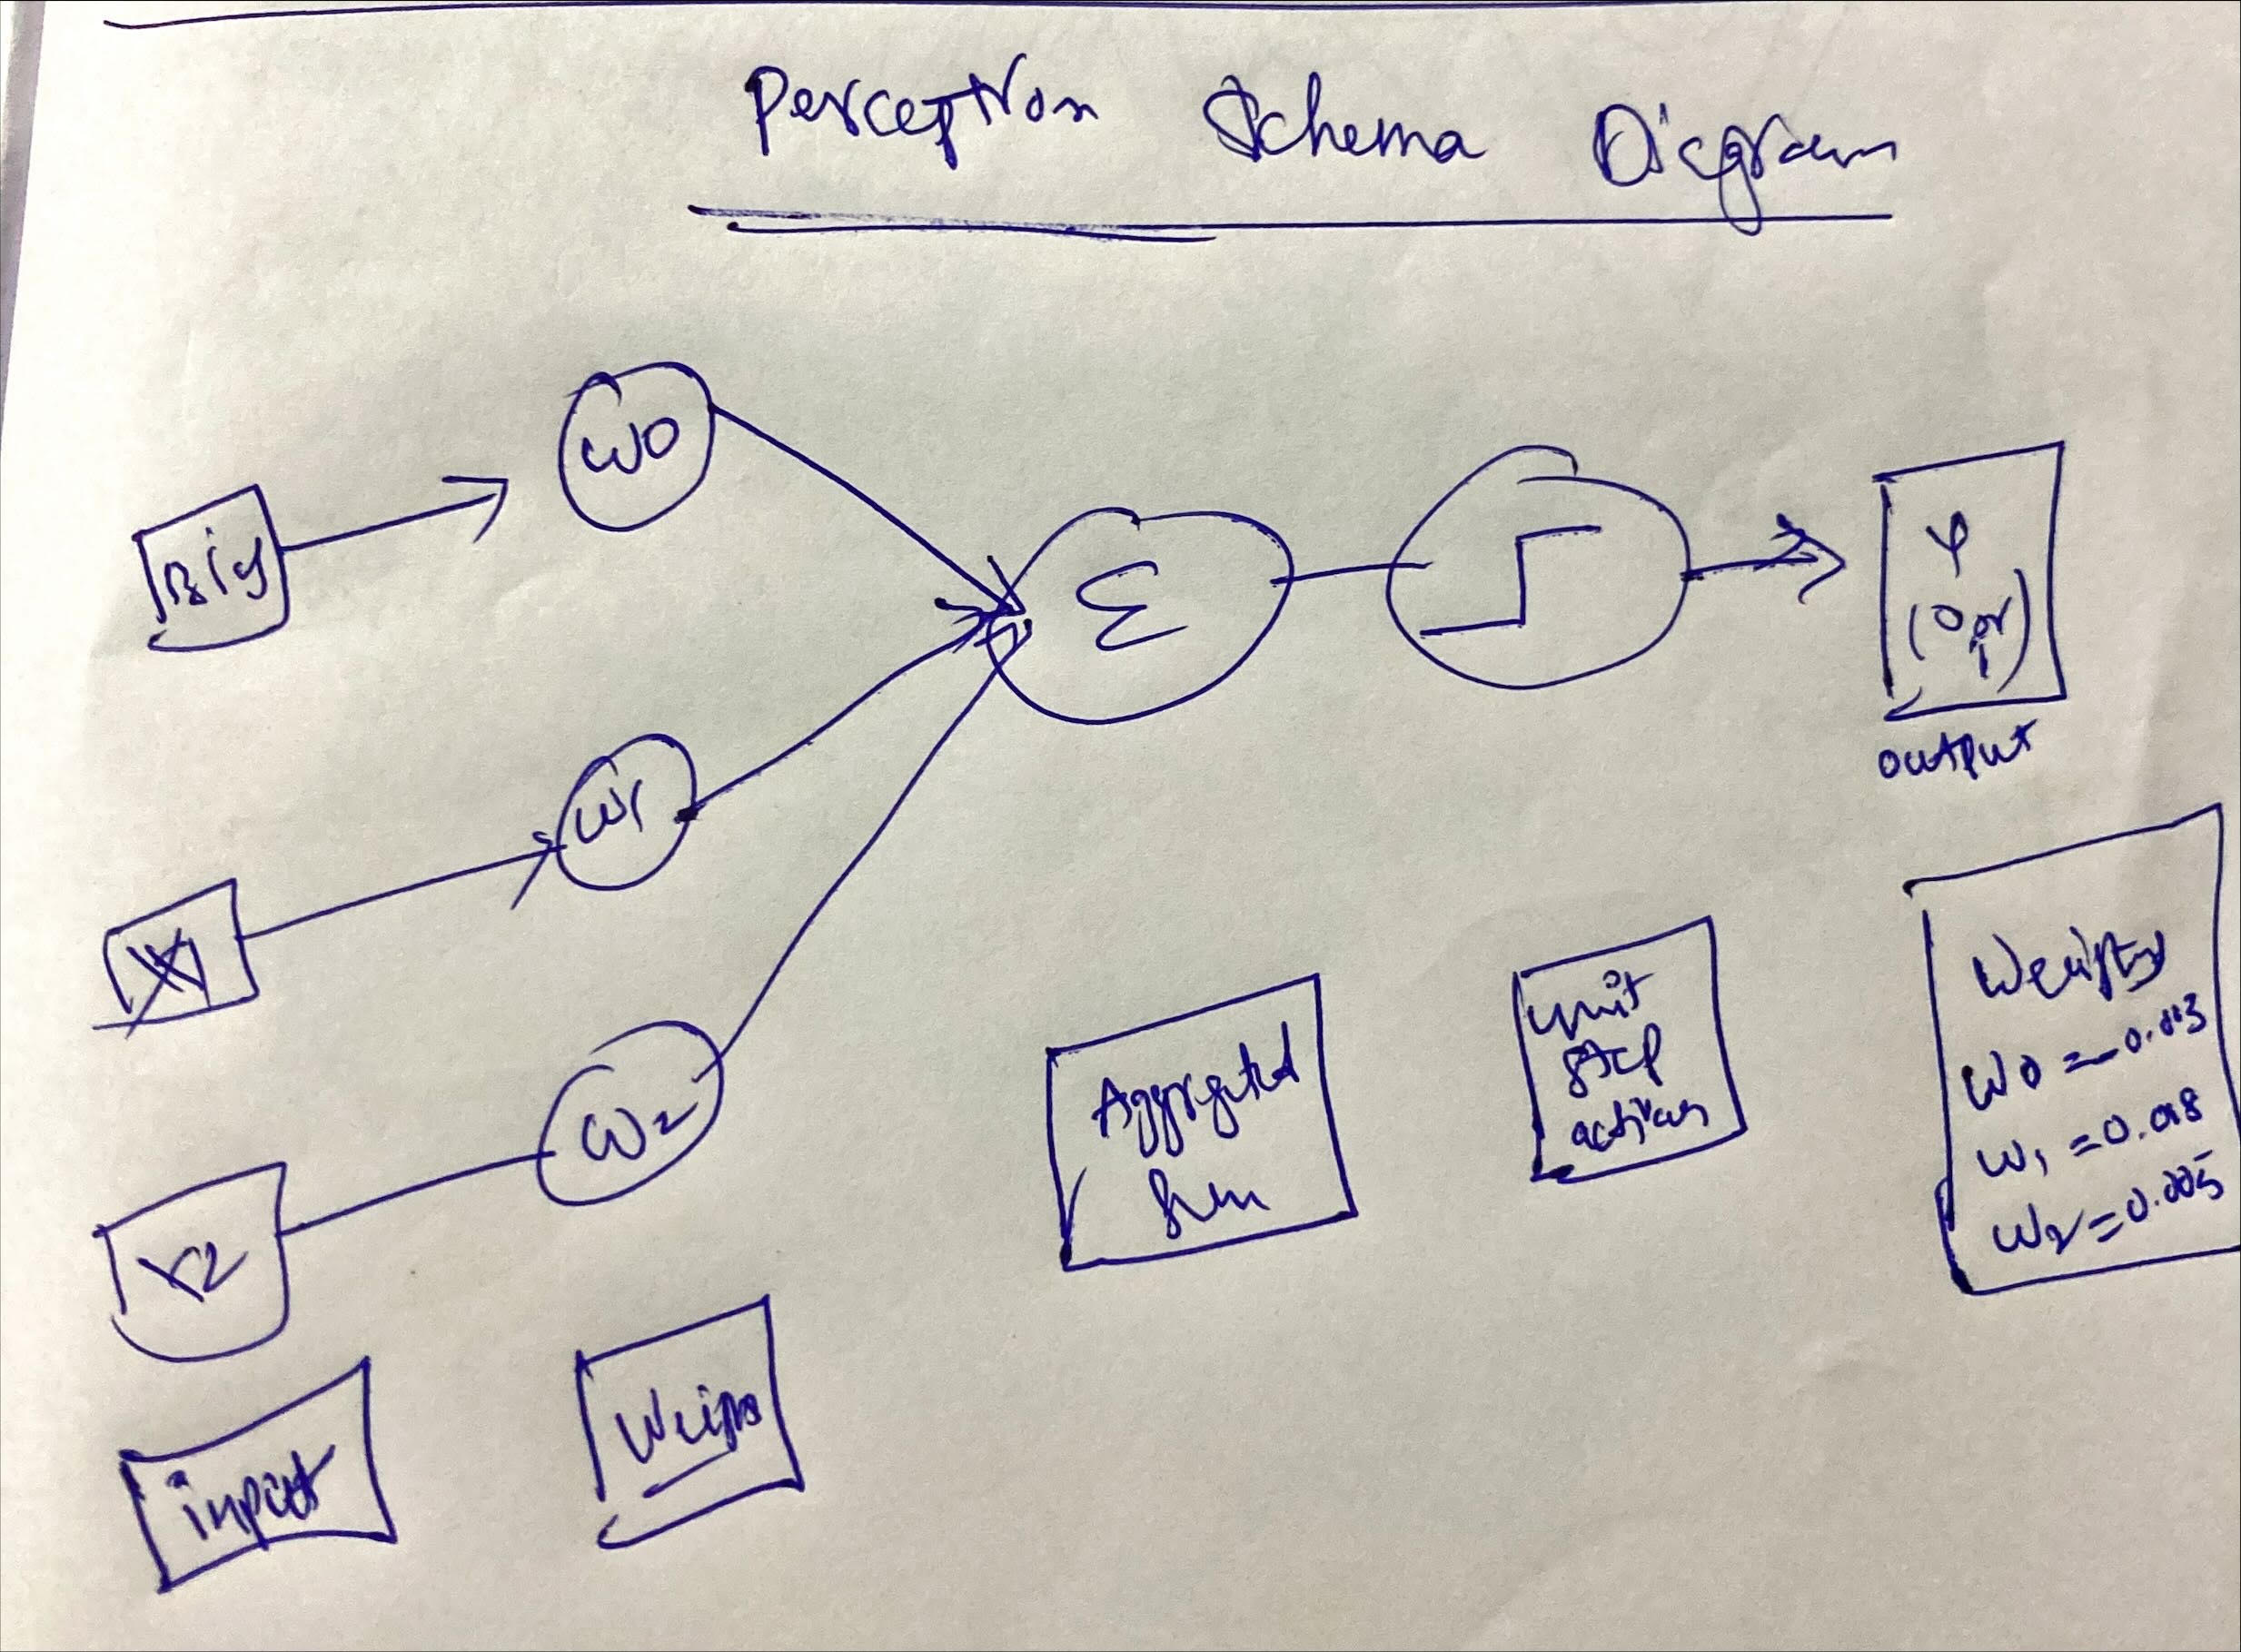

## Q2. Train a Neural Network

In [12]:
diabetes_df = pd.read_csv('diabetes.csv')

In [13]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
X = diabetes_df.drop(['Outcome'],axis = 1)
y = diabetes_df['Outcome']

In [16]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [17]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

### Q2.1 Implement a single hidden layer MLP. The final output layer will have 3 neurons, one for each result. Arch: [Input, hidden, output]- 2 Marks

In [18]:
standardscaler = StandardScaler()
X_trainscaled=standardscaler.fit_transform(X_train)
X_testscaled=standardscaler.transform(X_test)

In [19]:
clf = MLPClassifier(hidden_layer_sizes=(32),activation="relu",random_state=1).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.8441558441558441


In [20]:
# Print the accuracy score based on the MLP classifiers predictions
print("Accuracy of the MLP Classifier is: {:.2f}%".format(clf.score(X_testscaled, y_test)*100))

Accuracy of the MLP Classifier is: 84.42%


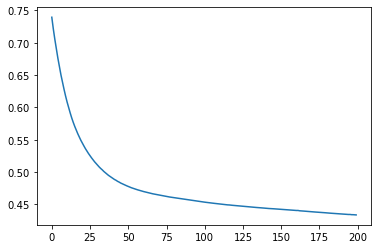

In [21]:
# display the loss curve encountered during the MLP interations
# We see a nice declining trend and then flattening out
# of the training/test losses after few 100s of iterations
plt.plot(clf.loss_curve_)

In [22]:
# display the # of layers in the MLP classifier created above
# we see that there are 3 layers - 1 input, 1 hidden and 1 output layers
clf.n_layers_

3

In [23]:
# display the # of nodes in the output layer of the MLP classifier created
# we see that there are 2 nodes in the output layer
clf.n_outputs_

1

In [24]:
# display the activation function used in final output layer by the MLP classifier 
# we see that the logistic activation function is used
clf.out_activation_

'logistic'

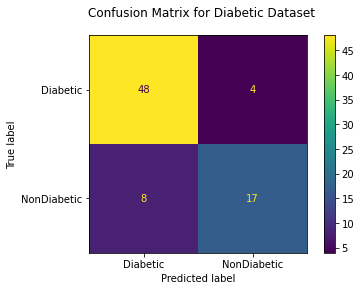

In [25]:
fig=plot_confusion_matrix(clf,X_testscaled, y_test,display_labels=["Diabetic","NonDiabetic"])
fig.figure_.suptitle("Confusion Matrix for Diabetic Dataset")
plt.show()

### Now use an NN with two hidden layers. The first hidden layer has 8 neurons.The second hidden layer has 4 neurons. The third hidden layer has 4 neurons . Arch: [Input,hidden1,hidden2,hidden3,output]

(i) Use keras or any other framework to design the NN model and train on the iris data.

(ii) Draw the schematic diagram of the NN along with all the weights and specify a suitable activation function. How many trainable parameters are there?


 ### Q2.2 (i)Use Keras or any other framework to design the NN model and train on the diabetes data. Report the accuracy

In [26]:
model = Sequential()
model.add(Dense(8, input_dim = 8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [27]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
training_history = model.fit(X_trainscaled, y_train, epochs = 50, batch_size= 10)

Epoch 1/50
70/70 [==============================] - 3s 7ms/step - loss: 0.6868 - accuracy: 0.6136
Epoch 2/50
70/70 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.6700
Epoch 3/50
70/70 [==============================] - 0s 7ms/step - loss: 0.6327 - accuracy: 0.6556
Epoch 4/50
70/70 [==============================] - 1s 7ms/step - loss: 0.5893 - accuracy: 0.6671
Epoch 5/50
70/70 [==============================] - 0s 6ms/step - loss: 0.5540 - accuracy: 0.7149
Epoch 6/50
70/70 [==============================] - 0s 5ms/step - loss: 0.5329 - accuracy: 0.7395
Epoch 7/50
70/70 [==============================] - 0s 5ms/step - loss: 0.5201 - accuracy: 0.7540
Epoch 8/50
70/70 [==============================] - 0s 5ms/step - loss: 0.5108 - accuracy: 0.7554
Epoch 9/50
70/70 [==============================] - 0s 5ms/step - loss: 0.5059 - accuracy: 0.7482
Epoch 10/50
70/70 [==============================] - 0s 5ms/step - loss: 0.5003 - accuracy: 0.7554
Epoch 11/50
70/70 [

In [29]:
test_loss, test_acc = model.evaluate(X_testscaled, y_test)

3/3 [==============================] - 1s 10ms/step - loss: 0.4137 - accuracy: 0.8182


In [30]:
print('Test Accuracy: ', round(test_acc,3), '\nTest Loss: ', round(test_loss,3))

Test Accuracy:  0.818 
Test Loss:  0.414


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


### Q2.2 (ii) Draw the schematic diagram of the NN along with all the weights and specify a suitable activation function. How many trainable parameters are there? - 2 Marks

In [32]:
# Get the weights determined by the NN for each of the 3 layers
first = model.layers[0].get_weights()[0]
second = model.layers[1].get_weights()[0]
third = model.layers[2].get_weights()[0]
final = model.layers[3].get_weights()[0]

# Print the weights determined by the NN for each of the 3 layers
print("First Layer Weights are: \n", first)
print("Second Layer Weights are: \n", second)
print("Third Layer Weights are: \n", third)
print("Final Layer Weights are: \n", final)

First Layer Weights are: 
 [[ 0.06189388  0.15039834  0.2655171   0.19422281 -0.21946245  0.09775765
  -1.079529    0.50044954]
 [-0.60524416  0.030163   -0.51187855 -0.4883475  -0.5960151   0.22338028
  -0.18223424  1.2449964 ]
 [-0.09209757  0.1243526   0.02577332 -0.02083586  0.4218681  -0.05751378
   0.17421812  0.06168562]
 [ 0.36629847 -0.4682934  -0.22096373  0.2577202  -0.02513197  0.367455
   0.505508    0.07135529]
 [ 0.6624272   0.67580223 -0.5364959  -0.49683982 -0.2092361  -0.3908212
  -0.68041456  0.17570989]
 [-0.30148685 -0.94473505 -0.46893346  0.11368021 -0.61475366  0.41169673
  -0.5941049   0.3580112 ]
 [-0.5551576   0.14177372 -0.5825163  -0.2683284  -0.37094712  0.54181236
   0.23464887  0.37159723]
 [-0.63444877 -0.30571046 -0.04318523  0.40895692  0.41618523 -0.04559951
  -0.6897483   0.4234457 ]]
Second Layer Weights are: 
 [[-0.05809744 -0.23404409  0.04652723  0.9398889 ]
 [-1.023599    0.0709604   0.6451549  -0.43016857]
 [-0.9410163  -0.55789846  0.20819336

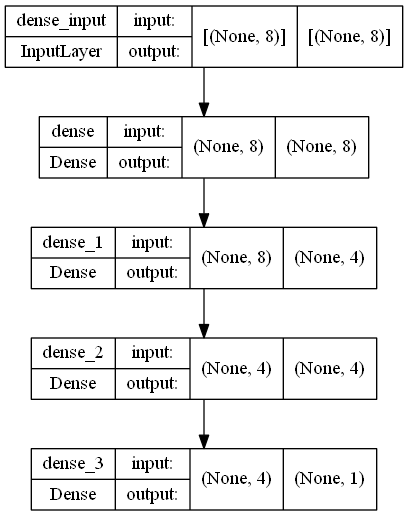

In [33]:
plot_model(model, show_shapes=True, show_layer_names=True)

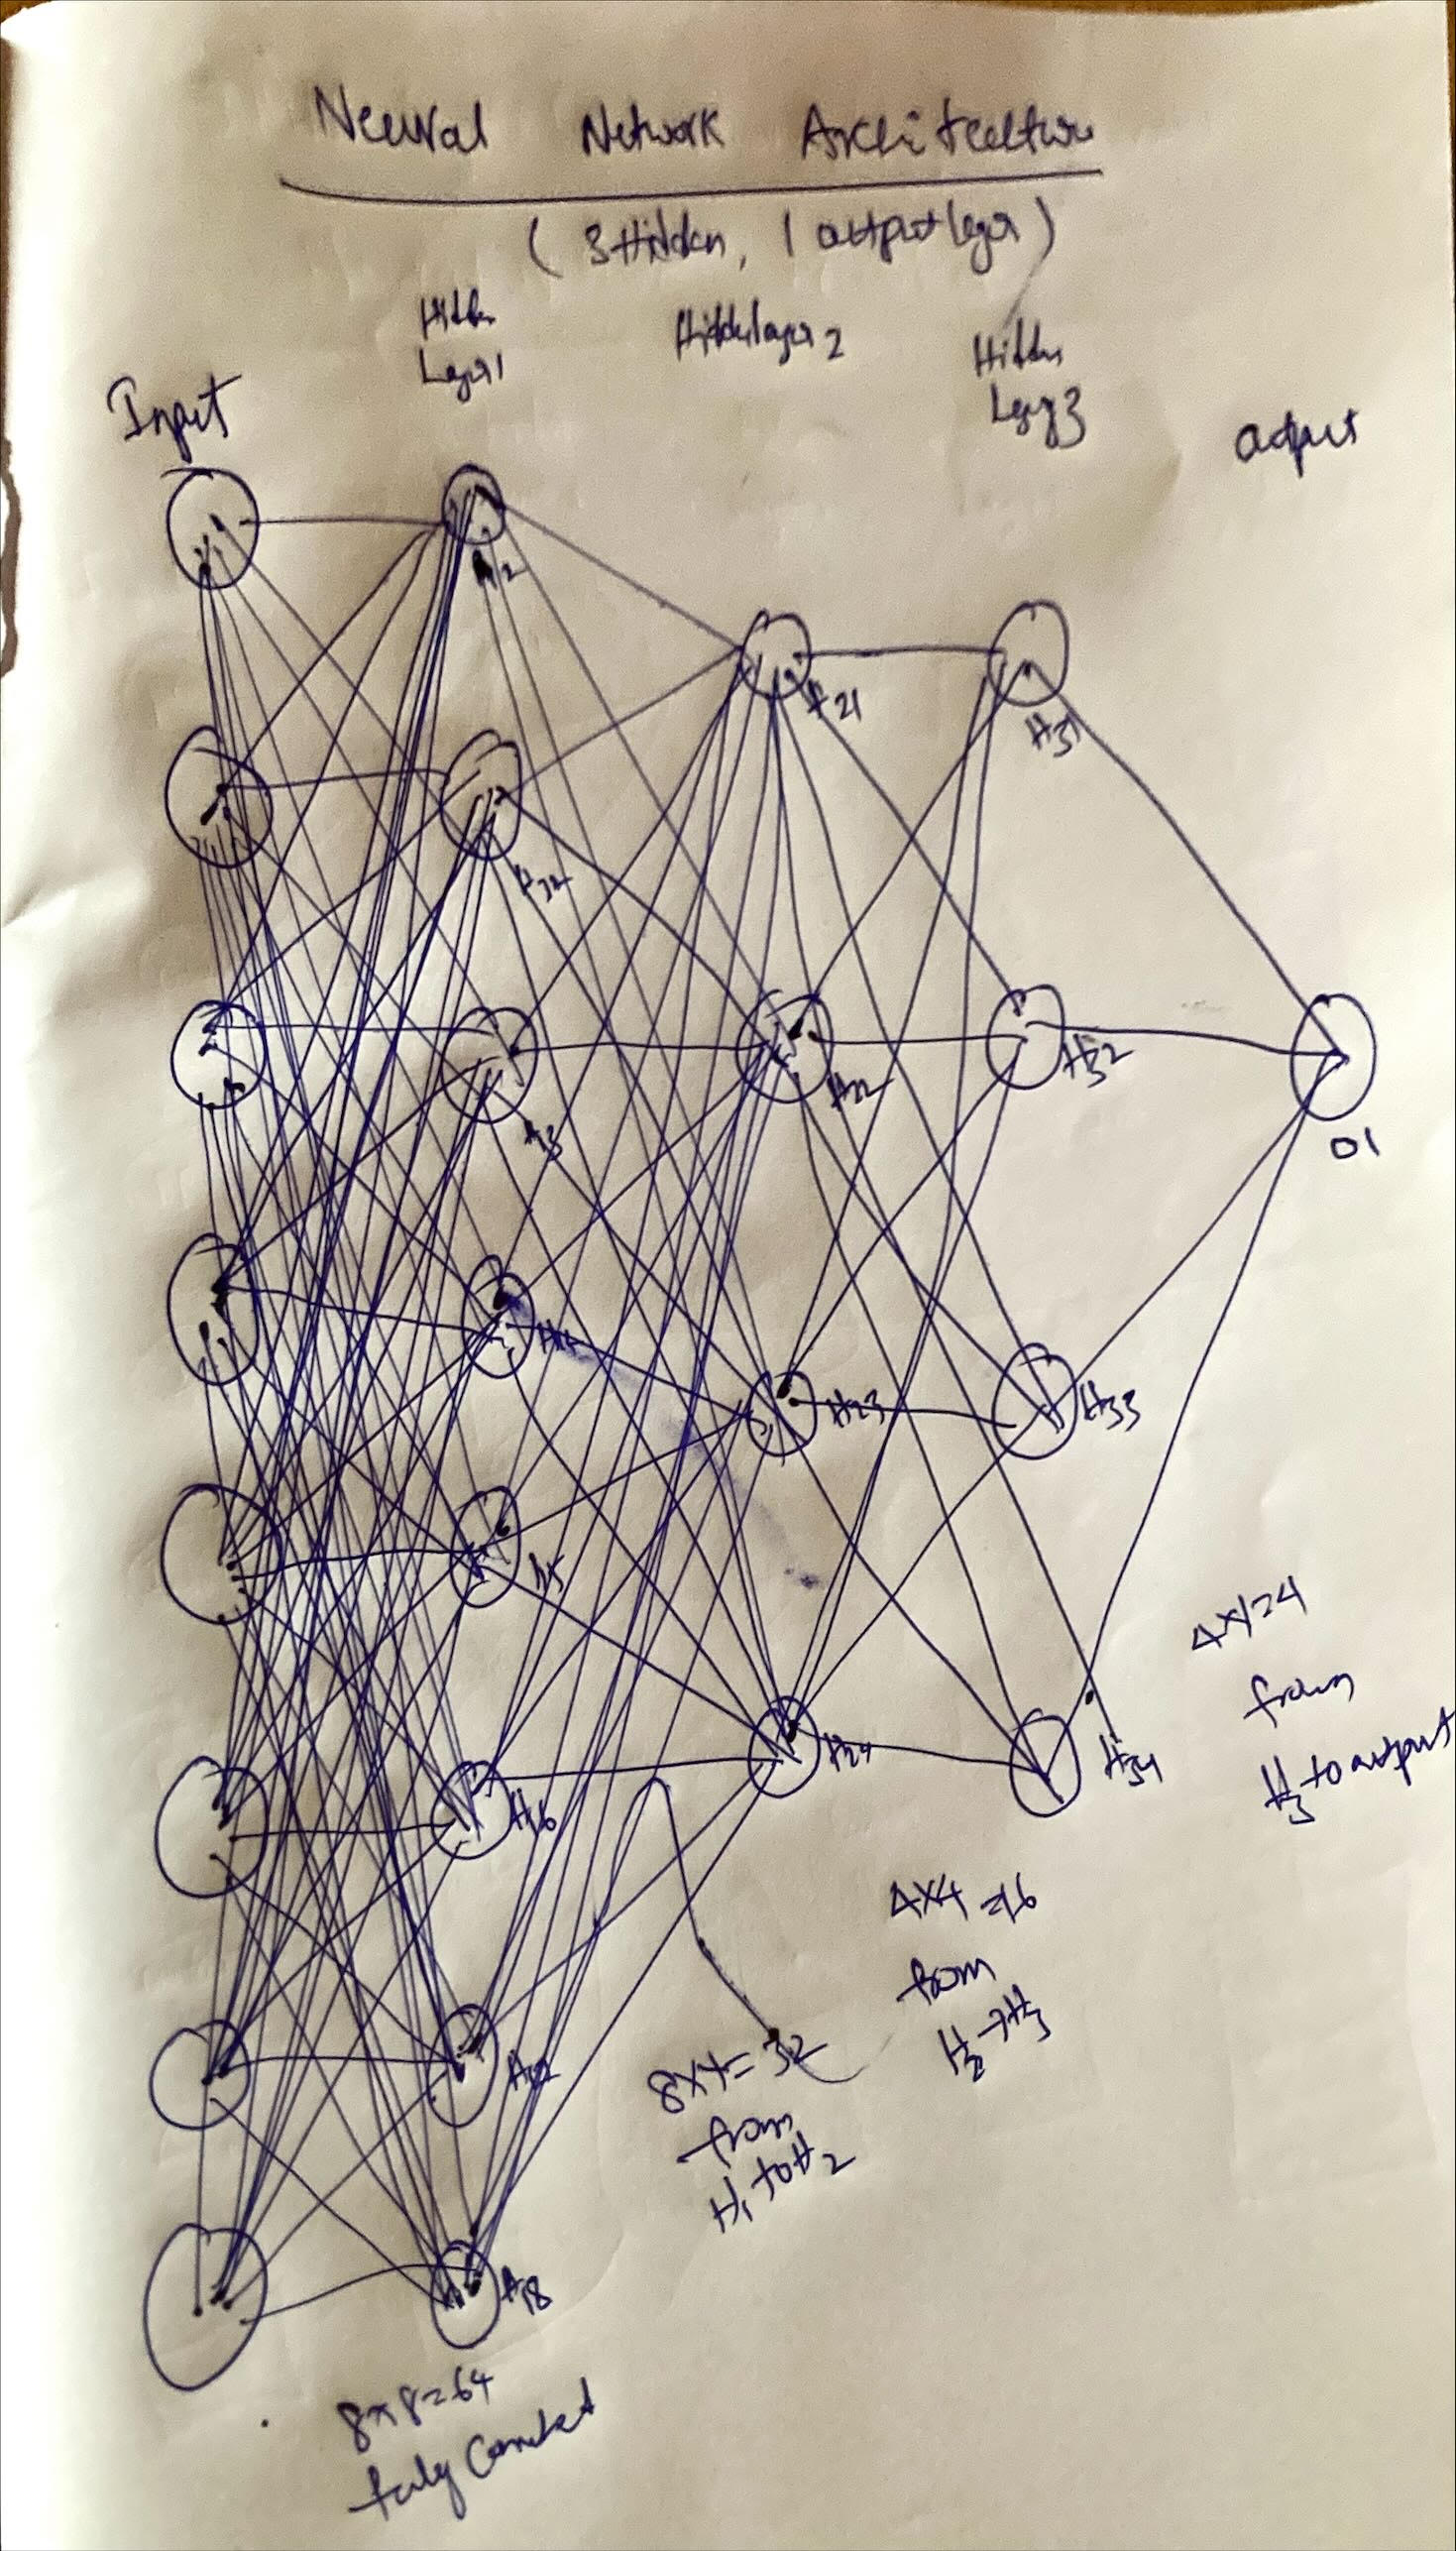